In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


data_dir = '/content/drive/MyDrive/dataset/UCMerced_LandUse/Images'  # Directory containing the 21 folders
img_width, img_height = 150, 150  # Desired image dimensions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List all the class labels
class_labels = os.listdir(data_dir)

# Initialize empty lists to store the images and labels
images = []
labels = []

In [ ]:
# Iterate through each folder
for class_label in class_labels:
    folder_path = os.path.join(data_dir, class_label)

    if os.path.isdir(folder_path):
        image_files = os.listdir(folder_path)

        # Load and resize the images, and store the labels
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (img_width, img_height))
            images.append(img)
            labels.append(class_label)


In [ ]:
# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform label encoding on the class labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

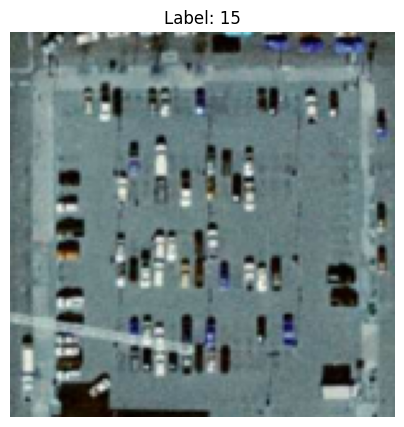

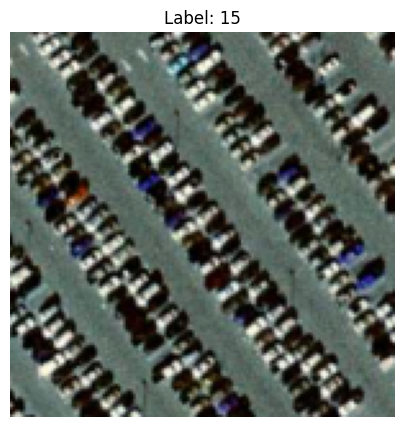

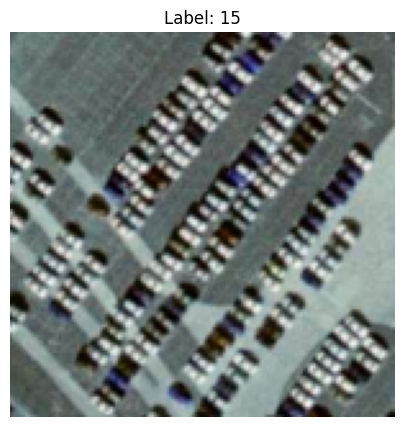

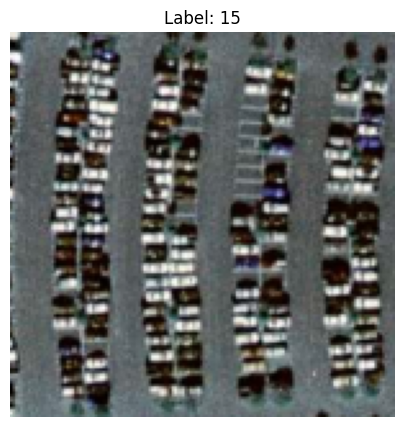

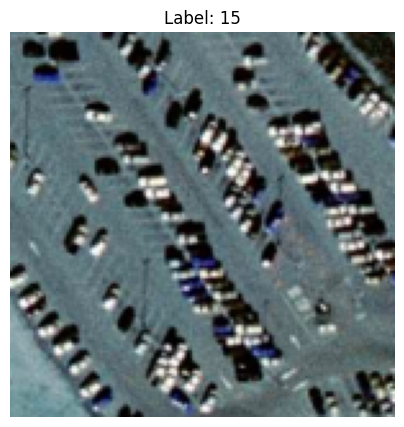

In [ ]:
import matplotlib.pyplot as plt
# Visualize the first 5 images
for i in range(5):
    plt.figure(figsize=(5, 5))
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
    plt.show()


In [ ]:
# Perform one-hot encoding on the labels
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# Shuffle the data
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]


In [ ]:
# Perform data normalization
images = images.astype('float32') / 255.0

In [ ]:
# Split the data into training, validation, and testing sets
train_split = 0.7  # Percentage of data for training
val_split = 0.15  # Percentage of data for validation
test_split = 0.15  # Percentage of data for testing

num_samples = len(images)
num_train_samples = int(train_split * num_samples)
num_val_samples = int(val_split * num_samples)

x_train = images[:num_train_samples]
y_train = labels[:num_train_samples]

x_val = images[num_train_samples:num_train_samples + num_val_samples]
y_val = labels[num_train_samples:num_train_samples + num_val_samples]

x_test = images[num_train_samples + num_val_samples:]
y_test = labels[num_train_samples + num_val_samples:]

print("Data preprocessing completed.")
print("Number of training samples:", len(x_train))
print("Number of validation samples:", len(x_val))
print("Number of testing samples:", len(x_test))

Data preprocessing completed.
Number of training samples: 1470
Number of validation samples: 315
Number of testing samples: 315
